In [1]:
# загружаем библиотеки
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
# загружаем файл
data = pd.read_csv('/datasets/insurance.csv')

In [3]:
# смотрим информацию

data.head(15)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [4]:
# смотрим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# смотрим информацию
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


In [6]:
# смотрим информацию
data.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2186e83490>,
      dtype=object)

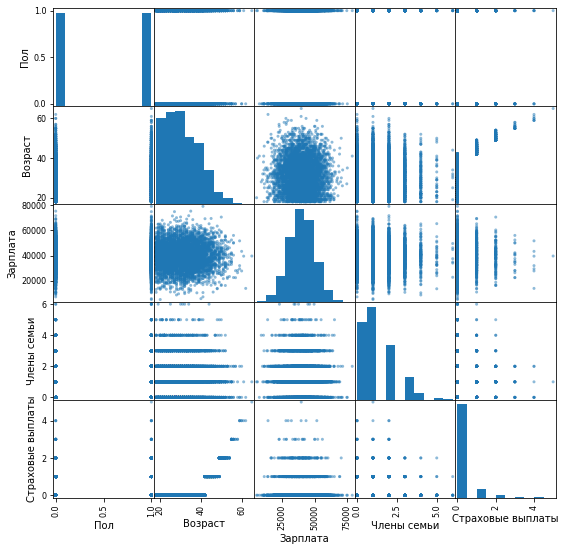

In [7]:
# смотрим корреляционную зависимость, но видимо это было лишним
pd.plotting.scatter_matrix(data, figsize=(9, 9))

In [8]:
# разбиваем на признаки и целевые признаки
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']
features.shape, target.shape

((5000, 4), (5000,))

In [9]:
# создадим рандомную обратимую матрицу
rnd = np.random.rand(4, 4)

np.linalg.inv(rnd)

array([[-1.59884646,  0.51024624,  1.96368549,  0.20694654],
       [-0.64278347,  0.9828376 , -2.2233615 ,  0.89213958],
       [ 1.6581858 , -0.21478387,  0.98881145, -1.1542896 ],
       [ 0.11377906, -0.68198932,  0.36963488,  1.02775158]])

In [10]:
# напишим функцию для обучения модели
def pred_r2(features, target):
    model = LinearRegression()
    model.fit(features, target)
    r2 = model.score(features, target)
    return r2

In [11]:
# смотрим на качество модели
pred_r2(features, target)

0.42494550286668

In [12]:
# смотрим на качество модели после умножения
feat_lin = features @ rnd
pred_r2(feat_lin, target)

0.42494550286667987

качество линейной регрессии не менятеся при умножении на обратимую матрицу

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:** возьмем $X_1$, - некоторые новые строки признаков, и подставим в формулу предсказний и в формулу обучения
$$a=X_1w=X_1(X^TX)^{-1}X^Ty$$ то отсюда получаем $$X_1X^{-1}y$$ после умножения на рандомную матрицу получаем $$a^1=X_1A((XA)^T(XA))^{-1}(XA)^Ty$$ от сюда получаем такой же результат $$X_1X^{-1}y$$

## Алгоритм преобразования

**Алгоритм**

1. умножим матрицу признаков на 63547
2. вычтем 756
3. умножем 9
4. поделим на 111
5. умножим на случайно обратимую матрицу

In [13]:
# применяем алгоритм, знаю что скобок можно поменьше, но так легче глазу воспринимать
feat_new = ((((features * 63547) - 756) * 9) / 111) @ rnd
feat_new.head(15)

,0,1,2,3
0,9.286093e+07,1.951101e+07,9.242621e+07,6.817592e+07
1,7.118938e+07,1.502063e+07,7.087999e+07,5.223853e+07
2,3.935194e+07,8.317317e+06,3.918699e+07,2.886799e+07
3,7.802966e+07,1.633648e+07,7.763735e+07,5.731330e+07
4,4.888386e+07,1.029900e+07,4.866816e+07,3.587696e+07
5,7.679030e+07,1.617807e+07,7.644906e+07,5.636578e+07
6,7.434730e+07,1.565201e+07,7.401227e+07,5.457753e+07
7,7.224958e+07,1.515900e+07,7.190208e+07,5.306791e+07
8,9.303219e+07,1.952459e+07,9.258736e+07,6.831064e+07
9,9.675877e+07,2.028247e+07,9.628596e+07,7.105636e+07


In [14]:
# повторение для наглядности
pred_r2(features, target)

0.42494550286668

In [15]:
# проверка модели после применения алгоритма
pred_r2(feat_new, target)

0.42494550286668187

качество линейной регрессии не поменялась